In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

**import datasets**

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head(80)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
75,male,group B,associate's degree,free/reduced,none,44,41,38
76,male,group E,some high school,standard,none,30,26,22
77,male,group A,bachelor's degree,standard,completed,80,78,81
78,female,group D,some high school,standard,completed,61,74,72


**Data Visualization**

In [3]:
male = df[df["gender"]=="male"]
female = df[df["gender"]=="female"]

In [4]:
male

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


(array([642.,   0.,   0.,   0., 358.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

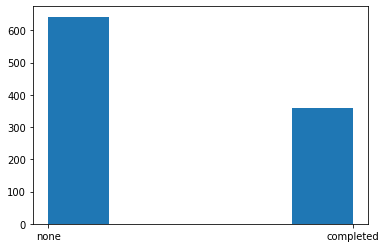

In [5]:
#plt.bar(male["race/ethnicity"],male["math score"])
plt.hist(df["test preparation course"], bins=5)
#plt.hist(female["test preparation course"])

In [6]:
check_nan_in_df = df.isnull().values.any()
check_nan_in_df

False

In [7]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

**Data Processing**

In [8]:
df =  df.replace(["female", "male", "group A","group B", "group C", "group D","group E", "bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', 'standard', 'free/reduced', 'none', 'completed'],[1,2,0,1,2,3,4,0,1,2,3,4,5,0,1,0,1])

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,0,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,2,0,0,90,95,93
3,2,0,3,1,0,47,57,44
4,2,2,1,0,0,76,78,75


In [10]:
df['mean'] = (df["math score"]+df["reading score"]+df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,1,1,0,0,0,72,72,74,72.666667
1,1,2,1,0,1,69,90,88,82.333333
2,1,1,2,0,0,90,95,93,92.666667
3,2,0,3,1,0,47,57,44,49.333333
4,2,2,1,0,0,76,78,75,76.333333


In [11]:
from sklearn import preprocessing
from sklearn import utils

In [12]:
lab_enc = preprocessing.LabelEncoder()

In [13]:
X = df.drop(["mean","math score", "reading score","writing score"], axis=1).values
y = lab_enc.fit_transform(df["mean"])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
clf = RandomForestClassifier()

In [16]:
clf.fit(X,y)

RandomForestClassifier()

In [17]:
print(clf.feature_importances_)

[0.10762478 0.35154343 0.37225197 0.08428133 0.08429849]


In [18]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
print(clf.score(x_test, y_test))

0.0
